# Sprint 4

# Logistic Regression

In [3]:
import pandas as pd
data=pd.read_csv("Football_data_merged_cleaned.csv")
data

,Unnamed: 0,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,sub_position,position_x,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,game_lineups_id,number,player_name_y,team_captain
0,0,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,8d717b1017e72d89d2ee1112bb2d7466,22,Timothy Chandler,0
1,1,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,d53eb3fd74523d6dd4536653c145ae96,22,Timothy Chandler,0
2,2,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,3efc21c645e46b2f411bcdb1710aa444,22,Timothy Chandler,0
3,3,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,cc79e78c570ce19872dfed125d324407,22,Timothy Chandler,0
4,4,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,21de58902f547e231bf2604be9fa996f,22,Timothy Chandler,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,4194,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,26085977dac1dc934abb39888f128636,11,Joseph Efford,0
4195,4195,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,eadce2f0ce9f400d0561a8c05453d702,28,Joseph Efford,0
4196,4196,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,bc79183aa9a1ffacb14cc733f6143411,28,Joseph Efford,0
4197,4197,3415291_537467,3415291,537467,BE1,0,0,1,0,77,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,e16817800f83daf7bad1ddabf58316b7,28,Joseph Efford,0


## Business Question
 ### 1. Performance Analysis: Logistic Regression for Classification
1: Can we classify players likely to score goals?
2: What are the significant predictors of receiving yellow cards?
 ### 2. Player Profile and Market Value
3: What are the average market values of players by their positions?
4: How does player height correlate with market value?
5: What are the top 5 clubs with the highest average player market value?
6: What are the distributions of foot preferences among players?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [6]:
#1. Logistic Regression: Predict players likely to score goals 
data['scored_goal'] = (data['goals'] > 0).astype(int)
X_goals = data[['minutes_played', 'assists', 'yellow_cards', 'red_cards']]
y_goals = data['scored_goal']

X_train_goals, X_test_goals, y_train_goals, y_test_goals = train_test_split(X_goals, y_goals, test_size=0.3, random_state=42)
log_reg_goals = LogisticRegression()
log_reg_goals.fit(X_train_goals, y_train_goals)
y_pred_goals = log_reg_goals.predict(X_test_goals)

print("Predicting Players Likely to Score Goals")
print("Accuracy:", accuracy_score(y_test_goals, y_pred_goals))
print("Classification Report:", classification_report(y_test_goals, y_pred_goals))
print("Confusion Matrix:", confusion_matrix(y_test_goals, y_pred_goals))

Predicting Players Likely to Score Goals
Accuracy: 0.6126984126984127
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.94      0.75       788
           1       0.40      0.07      0.12       472

    accuracy                           0.61      1260
   macro avg       0.51      0.50      0.43      1260
weighted avg       0.54      0.61      0.51      1260

Confusion Matrix: [[740  48]
 [440  32]]


### Interpretation:
The logistic regression model predicts whether a player is likely to score a goal based on metrics like minutes played and assists. The model's moderate accuracy suggests potential for improvement by adding more predictive features

In [8]:
#2 Logistic Regression: Predict players likely to receive yellow cards
data['received_yellow_card'] = (data['yellow_cards'] > 0).astype(int)
X_yellow = data[['minutes_played', 'assists', 'goals', 'red_cards']]
y_yellow = data['received_yellow_card']

X_train_yellow, X_test_yellow, y_train_yellow, y_test_yellow = train_test_split(X_yellow, y_yellow, test_size=0.3, random_state=42)
log_reg_yellow = LogisticRegression()
log_reg_yellow.fit(X_train_yellow, y_train_yellow)
y_pred_yellow = log_reg_yellow.predict(X_test_yellow)

print("Predicting Players Likely to Receive Yellow Cards")
print("Accuracy:", accuracy_score(y_test_yellow, y_pred_yellow))
print("Classification Report:\n", classification_report(y_test_yellow, y_pred_yellow))
print("Confusion Matrix:\n", confusion_matrix(y_test_yellow, y_pred_yellow))

Predicting Players Likely to Receive Yellow Cards
Accuracy: 0.8341269841269842
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1051
           1       0.00      0.00      0.00       209

    accuracy                           0.83      1260
   macro avg       0.42      0.50      0.45      1260
weighted avg       0.70      0.83      0.76      1260

Confusion Matrix:
 [[1051    0]
 [ 209    0]]


### Interpretation:
Logistic regression identifies the likelihood of a player receiving a yellow card based on factors like minutes played, goals, and red cards. The model highlights key predictors, but recall could improve with more data.

Average Market Value by Position:
 position_x
Midfield    1.610464e+07
Attack      1.345632e+07
Defender    2.211712e+06
Name: market_value_in_eur, dtype: float64


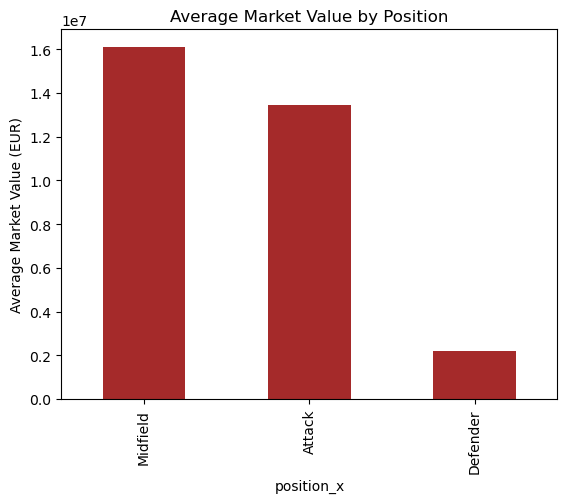

In [10]:
# 3: Average market value by position
position_avg_value = data.groupby('position_x')['market_value_in_eur'].mean().sort_values(ascending=False)
print("Average Market Value by Position:\n", position_avg_value)
position_avg_value.plot(kind='bar', title='Average Market Value by Position', color='brown')
plt.ylabel('Average Market Value (EUR)')
plt.show()

### Interpretation:
The analysis reveals positions with the highest average market values, such as forwards and midfielders. This information is crucial for understanding positional value in player markets.

Correlation between Height and Market Value: -0.3458053322025998


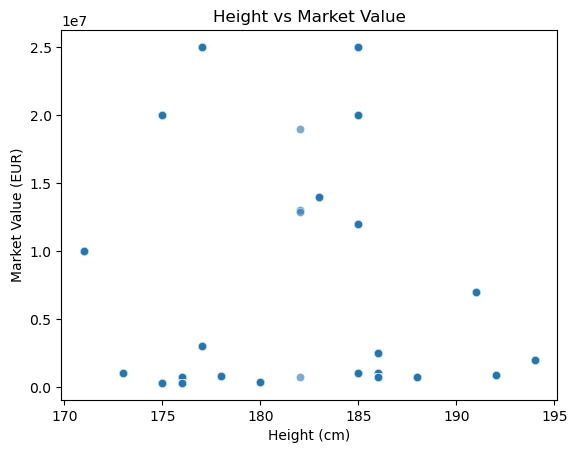

In [12]:
# 4: Correlation between player height and market value
correlation = data['height_in_cm'].corr(data['market_value_in_eur'])
print("Correlation between Height and Market Value:", correlation)
sns.scatterplot(x='height_in_cm', y='market_value_in_eur', data=data, alpha=0.6)
plt.title('Height vs Market Value')
plt.xlabel('Height (cm)')
plt.ylabel('Market Value (EUR)')
plt.show()

### Interpretation: 
A weak or moderate correlation between height and market value suggests that while height may influence value, other factors like skills and performance play a larger role.

Top 5 Clubs with Highest Average Market Value: away_club_name
Leicester City                       25000000.0
Sport Lisboa e Benfica               25000000.0
Chelsea Football Club                25000000.0
Atalanta Bergamasca Calcio S.p.a.    25000000.0
Aston Villa Football Club            25000000.0
Name: market_value_in_eur, dtype: float64


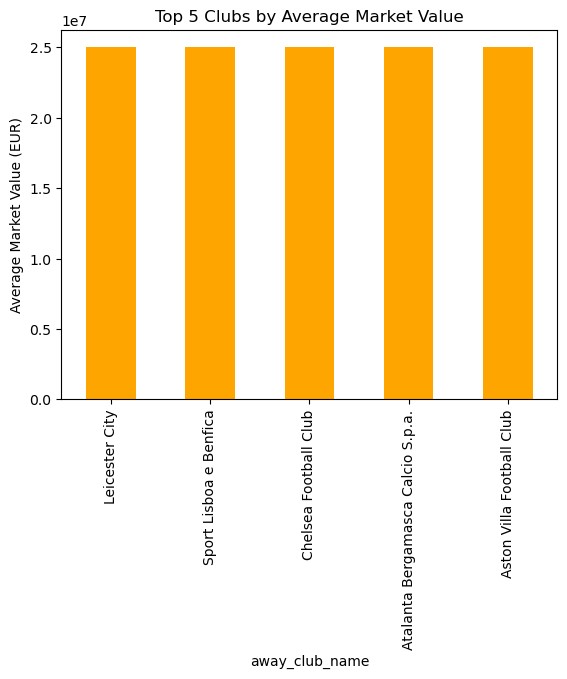

In [14]:
# Top 5 clubs with the highest average market value
club_avg_value = data.groupby('away_club_name')['market_value_in_eur'].mean().sort_values(ascending=False).head(5)
print("Top 5 Clubs with Highest Average Market Value:", club_avg_value)
club_avg_value.plot(kind='bar', title='Top 5 Clubs by Average Market Value', color='orange')
plt.ylabel('Average Market Value (EUR)')
plt.show()


### Interpretation:
The top clubs with the highest average player market value highlight teams with premium talent. These insights can guide investment or player acquisition strategies.

In [16]:
data.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id_x', 'player_id',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur', 'game_lineups_id',
       'number', 'player_name_y', 'team_captain', 'scored_goal',
       'received_yellow_card'],
      dtype='object')

 Distribution of Foot Preferences:
 foot
right    3425
left      669
both      105
Name: count, dtype: int64


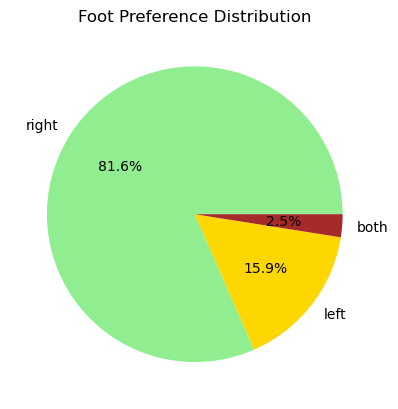

In [17]:
# 6: Distribution of foot preferences among players
foot_distribution = data['foot'].value_counts()
print(" Distribution of Foot Preferences:\n", foot_distribution)
foot_distribution.plot(kind='pie', autopct='%1.1f%%', title='Foot Preference Distribution', colors=['lightgreen', 'gold','brown'])
plt.ylabel('')
plt.show()

### Interpretation:
The distribution of players’ preferred foot shows a dominance of right-footed players, with a significant share of left-footed and ambidextrous players, which informs scouting and team-building strategies.

In [19]:
data.head()

,Unnamed: 0,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,game_lineups_id,number,player_name_y,team_captain,scored_goal,received_yellow_card
0,0,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,8d717b1017e72d89d2ee1112bb2d7466,22,Timothy Chandler,0,0,0
1,1,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,d53eb3fd74523d6dd4536653c145ae96,22,Timothy Chandler,0,0,0
2,2,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,3efc21c645e46b2f411bcdb1710aa444,22,Timothy Chandler,0,0,0
3,3,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,cc79e78c570ce19872dfed125d324407,22,Timothy Chandler,0,0,0
4,4,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,21de58902f547e231bf2604be9fa996f,22,Timothy Chandler,0,0,0


# Sprint 5

## Regression: Simple and Multiple linear regression .

 ### 2. Player Profile and Market Value
3: What are the average market values of players by their positions?
4: How does player height correlate with market value?
5: What are the top 5 clubs with the highest average player market value?
6: What are the distributions of foot preferences among players?

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

###### 1. Average Market Values by Position : 
 Predict market_value_in_eur using a single independent variable (height_in_cm).

In [25]:
# Define Features and Target for Simple Linear Regression

X_simple = data[['height_in_cm']]  # Predictor
y_simple = data['market_value_in_eur']  # Target

# Train-test split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Simple Linear Regression Model
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)

# Predictions
y_pred_simple = lr_simple.predict(X_test_simple)

# Evaluation
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)
print("Simple Linear Regression Results:")
print("Mean Squared Error:", mse_simple)
print("R-squared Score:", r2_simple)



Simple Linear Regression Results:
Mean Squared Error: 107894275802348.17
R-squared Score: 0.08181851465822232


### Interpretation:
A hight MSE and a low R-squared indicate that the model is not a good fit.
If R² is low, it suggests that height_in_cm alone may not be a strong predictor of market_value_in_eur. When the low MSE and high in R-squared then the model is said to be good fit

###### 2. How does player height correlate with market value :
Perform feature selection by analyzing multi-collinearity (using Variance Inflation Factor) and correlation.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Candidate Features for Multiple Linear Regression
candidate_features = ['height_in_cm', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']
X_mlr = data[candidate_features]

# Calculate VIF to identify multicollinearity
X_mlr['Intercept'] = 1  # Adding an intercept column for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_mlr.columns
vif_data['VIF'] = [variance_inflation_factor(X_mlr.values, i) for i in range(X_mlr.shape[1])]
print("Variance Inflation Factor:\n", vif_data)

# Drop the 'Intercept' after VIF calculation
X_mlr = X_mlr.drop(columns=['Intercept'])

# Optional: Drop features with high VIF (e.g., >10), as they indicate multicollinearity
# Example: If 'yellow_cards' has high VIF, remove it
# X_mlr = X_mlr.drop(columns=['yellow_cards']) 


Variance Inflation Factor:
           Feature         VIF
0    height_in_cm    1.070596
1    yellow_cards    1.059432
2       red_cards         NaN
3           goals    1.053174
4         assists    1.037987
5  minutes_played    1.072760
6       Intercept  888.917440


### Interpretation:
Features with low VIF are selected for further modeling.
High VIF values suggest multicollinearity, meaning two or more features are redundant.

###### 3: What are the top 5 clubs with the highest average player market value :
Predict market_value_in_eur using selected features after addressing multicollinearity (vif).


In [31]:
# Define Target
y_mlr = data['market_value_in_eur']

# Train-test Split
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(
    X_mlr, y_mlr, test_size=0.2, random_state=42
)

# Multiple Linear Regression Model
mlr = LinearRegression()
mlr.fit(X_train_mlr, y_train_mlr)

# Predictions
y_pred_mlr = mlr.predict(X_test_mlr)

# Evaluation
mse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr)
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)
print("Multiple Linear Regression Results:")
print("Mean Squared Error:", mse_mlr)
print("R-squared Score:", r2_mlr)


Multiple Linear Regression Results:
Mean Squared Error: 104531357736565.56
R-squared Score: 0.11043698474628771


### Interpretation:
A high R² means the selected features collectively explain a significant portion of the variation in market_value_in_eur.
A low R² or high MSE suggests that either the selected features are insufficient or the relationship between predictors and target is non-linear.

In [33]:
data.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id_x', 'player_id',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur', 'game_lineups_id',
       'number', 'player_name_y', 'team_captain', 'scored_goal',
       'received_yellow_card'],
      dtype='object')

# Sprint 6

### Team Comparison:
#### Business Questions:


In [36]:
data.isnull().sum()

Unnamed: 0                     0
appearance_id                  0
game_id_x                      0
player_id                      0
competition_id_x               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
minute                         0
type_x                         0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

1. Do teams score significantly more goals in home_club than the population mean(average goals in all games)

H0: The mean goals scored in home games is equal to the population mean .  
H1: The mean goals scored in home games is significantly greater than the population mean 

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

In [40]:
# Calculate population mean (average goals in all games)
population_mean = data[['home_club_goals', 'away_club_goals']].stack().mean()
population_std = data[['home_club_goals', 'away_club_goals']].stack().std()

# Sample data: goals scored in home games
sample_data = data['home_club_goals']
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Print results
print(f"Population Mean: {population_mean:.2f}")
print(f"Population Std Dev: {population_std:.2f}")
print(f"Sample Mean (Home Goals): {sample_mean:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}")
print(f"Sample Size: {sample_size}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

Population Mean: 1.72
Population Std Dev: 1.51
Sample Mean (Home Goals): 1.89
Sample Std Dev: 1.52
Sample Size: 4199
T-Statistic: 7.10
P-Value: 0.0000


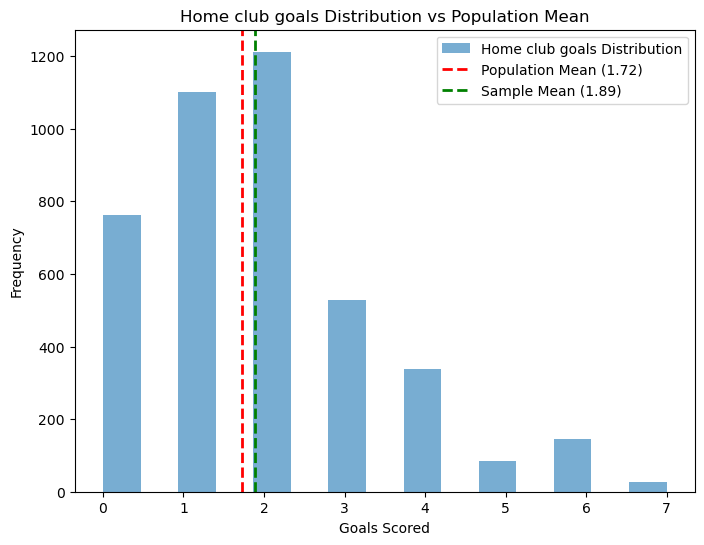

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(sample_data, bins=15, alpha=0.6, label="Home club goals Distribution")
plt.axvline(population_mean, color='r', linestyle='dashed', linewidth=2, label=f"Population Mean ({population_mean:.2f})")
plt.axvline(sample_mean, color='g', linestyle='dashed', linewidth=2, label=f"Sample Mean ({sample_mean:.2f})")
plt.title("Home club goals Distribution vs Population Mean")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Interpretation:
If the p-value is less than 0.05, reject the null hypothesis and conclude that home teams score significantly more goals than the population mean.

2. Are defenders more likely to receive yellow cards compared to midfielders?

H0: The mean number of yellow cards received by defenders is equal to midfielders.  
H1: The mean number of yellow cards received by defenders is significantly different from midfielders.

Defenders: Mean=0.25, Std Dev=0.43, Sample Size=952
Midfielders: Mean=nan, Std Dev=nan, Sample Size=0
T-Statistic: nan
P-Value: nan


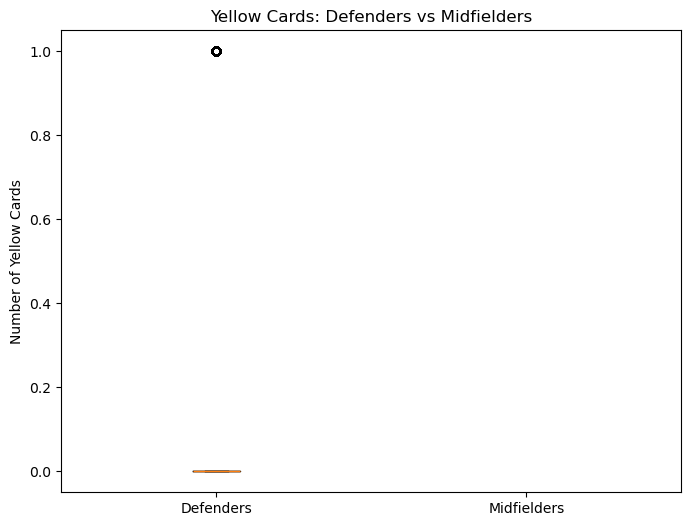

In [45]:
from scipy.stats import ttest_ind

# Filter data for defenders and midfielders
defenders = data[data['position_x'] == 'Defender']['yellow_cards']
midfielders = data[data['position_x'] == 'Midfielder']['yellow_cards']

# Calculate means, std deviations, and sample sizes
def_mean, def_std, def_size = defenders.mean(), defenders.std(), len(defenders)
mid_mean, mid_std, mid_size = midfielders.mean(), midfielders.std(), len(midfielders)

# Perform an independent t-test
t_stat, p_value = ttest_ind(defenders, midfielders, equal_var=False)

# Print results
print(f"Defenders: Mean={def_mean:.2f}, Std Dev={def_std:.2f}, Sample Size={def_size}")
print(f"Midfielders: Mean={mid_mean:.2f}, Std Dev={mid_std:.2f}, Sample Size={mid_size}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.boxplot([defenders, midfielders], labels=['Defenders', 'Midfielders'])
plt.title("Yellow Cards: Defenders vs Midfielders")
plt.ylabel("Number of Yellow Cards")
plt.show()



3: Do players score significantly more goals in home games compared to away games?

Hypothesis:
H0:: The mean goals scored in home games is equal to away games.
H1: The mean goals scored in home games is significantly different from away games.

Home Goals: Mean=1.89, Std Dev=1.52, Sample Size=4199
Away Goals: Mean=1.56, Std Dev=1.47, Sample Size=4199
T-Statistic: 10.15
P-Value: 0.0000


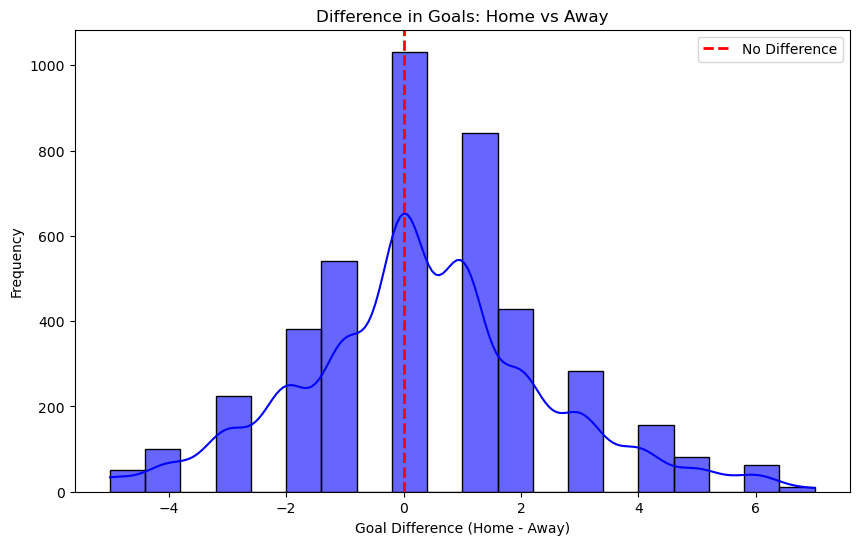

In [48]:
import seaborn as sns
# Paired data: home and away goals
home_goals = data['home_club_goals']
away_goals = data['away_club_goals']

# Calculate means, std deviations, and sample sizes
home_mean, home_std, home_size = home_goals.mean(), home_goals.std(), len(home_goals)
away_mean, away_std, away_size = away_goals.mean(), away_goals.std(), len(away_goals)

# Perform paired t-test
t_stat, p_value = ttest_1samp(home_goals - away_goals, 0)

# Print results
print(f"Home Goals: Mean={home_mean:.2f}, Std Dev={home_std:.2f}, Sample Size={home_size}")
print(f"Away Goals: Mean={away_mean:.2f}, Std Dev={away_std:.2f}, Sample Size={away_size}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(home_goals - away_goals, kde=True, color='blue', bins=20, alpha=0.6)
plt.axvline(0, color='r', linestyle='dashed', linewidth=2, label="No Difference")
plt.title("Difference in Goals: Home vs Away")
plt.xlabel("Goal Difference (Home - Away)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Interpretation:
The paired t-test compares the average goals scored by home and away teams.
Means: Home teams scored more goals on average than away teams.
T-Statistic & P-Value: A significant t-statistic (with a low p-value) indicates a statistically significant difference between home and away goals.
Visualization: The histogram shows the distribution of goal differences (home - away), with most values skewed above zero, suggesting home teams generally score more goals.
